In [132]:
import os
import sys
from collections import defaultdict
from functools import reduce, partial

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from mutspec.utils.draw import plot_mutspec192

In [32]:
df = pd.read_csv("/home/kpotoh/Downloads/counted_codons_cytb.csv").drop("Gene", axis=1)
# df["Gene"] = df["Gene"].str.upper()
df.head()

,Species,ExpectedObserved,A[A>C]A,A[A>C]C,A[A>C]G,A[A>C]T,A[A>G]A,A[A>G]C,A[A>G]G,A[A>G]T,...,T[T>A]G,T[T>A]T,T[T>C]A,T[T>C]C,T[T>C]G,T[T>C]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T
0,Abbottina_obtusirostris,Expected,8.0,4.0,4.0,4.0,8.0,4.0,4.0,4.0,...,12.0,9.0,10.0,14.0,12.0,9.0,10.0,14.0,12.0,9.0
1,Abbottina_obtusirostris,Observed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Abbottina_rivularis,Expected,6.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,...,8.0,10.0,5.0,9.0,8.0,10.0,5.0,9.0,8.0,10.0
3,Abbottina_rivularis,Observed,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0
4,Abramis_brama,Expected,9.0,3.0,4.0,5.0,9.0,3.0,4.0,5.0,...,13.0,9.0,10.0,15.0,13.0,9.0,10.0,15.0,13.0,9.0


In [61]:
_df = df.melt(["Species", "ExpectedObserved"], df.columns[2:], var_name="Mut")
_df.sort_values(["Species", "Mut"]).head(20)

,Species,ExpectedObserved,Mut,value
0,Abbottina_obtusirostris,Expected,A[A>C]A,8.0
1,Abbottina_obtusirostris,Observed,A[A>C]A,0.0
2048,Abbottina_obtusirostris,Expected,A[A>C]C,4.0
2049,Abbottina_obtusirostris,Observed,A[A>C]C,0.0
4096,Abbottina_obtusirostris,Expected,A[A>C]G,4.0
4097,Abbottina_obtusirostris,Observed,A[A>C]G,0.0
6144,Abbottina_obtusirostris,Expected,A[A>C]T,4.0
6145,Abbottina_obtusirostris,Observed,A[A>C]T,0.0
8192,Abbottina_obtusirostris,Expected,A[A>G]A,8.0
8193,Abbottina_obtusirostris,Observed,A[A>G]A,0.0


In [118]:
mutations = _df.pivot(index=["Species", "Mut"], columns="ExpectedObserved", values="value").reset_index()
mutations

ExpectedObserved,Species,Mut,Expected,Observed
0,Abbottina_obtusirostris,A[A>C]A,8.0,0.0
1,Abbottina_obtusirostris,A[A>C]C,4.0,0.0
2,Abbottina_obtusirostris,A[A>C]G,4.0,0.0
3,Abbottina_obtusirostris,A[A>C]T,4.0,0.0
4,Abbottina_obtusirostris,A[A>G]A,8.0,0.0
...,...,...,...,...
196603,Zosterops_japonicus,T[T>C]T,2.0,3.0
196604,Zosterops_japonicus,T[T>G]A,3.0,0.0
196605,Zosterops_japonicus,T[T>G]C,8.0,0.0
196606,Zosterops_japonicus,T[T>G]G,8.0,0.0


In [119]:
mutations["RawMutSpec"] = (mutations["Observed"] / mutations["Expected"]).fillna(0)
mutations["RawMutSpec"] = mutations["RawMutSpec"].replace(np.inf, 0)
mutations

ExpectedObserved,Species,Mut,Expected,Observed,RawMutSpec
0,Abbottina_obtusirostris,A[A>C]A,8.0,0.0,0.0
1,Abbottina_obtusirostris,A[A>C]C,4.0,0.0,0.0
2,Abbottina_obtusirostris,A[A>C]G,4.0,0.0,0.0
3,Abbottina_obtusirostris,A[A>C]T,4.0,0.0,0.0
4,Abbottina_obtusirostris,A[A>G]A,8.0,0.0,0.0
...,...,...,...,...,...
196603,Zosterops_japonicus,T[T>C]T,2.0,3.0,1.5
196604,Zosterops_japonicus,T[T>G]A,3.0,0.0,0.0
196605,Zosterops_japonicus,T[T>G]C,8.0,0.0,0.0
196606,Zosterops_japonicus,T[T>G]G,8.0,0.0,0.0


In [120]:
rawsum_df = mutations.groupby("Species").RawMutSpec.sum().reset_index().rename(columns={"RawMutSpec": "RawMutSpecSum"})

In [121]:
mutspecs = pd.merge(mutations, rawsum_df, on="Species")
mutspecs["MutSpec"] = mutspecs["RawMutSpec"] / mutspecs["RawMutSpecSum"]

In [127]:
mutspecs.head(1000).tail(20)

,Species,Mut,Expected,Observed,RawMutSpec,RawMutSpecSum,MutSpec
980,Acanthopagrus_schlegelii,A[C>T]A,13.0,2.0,0.153846,27.008453,0.005696
981,Acanthopagrus_schlegelii,A[C>T]C,12.0,2.0,0.166667,27.008453,0.006171
982,Acanthopagrus_schlegelii,A[C>T]G,6.0,5.0,0.833333,27.008453,0.030855
983,Acanthopagrus_schlegelii,A[C>T]T,8.0,1.0,0.125000,27.008453,0.004628
984,Acanthopagrus_schlegelii,A[G>A]A,0.0,2.0,0.000000,27.008453,0.000000
985,Acanthopagrus_schlegelii,A[G>A]C,2.0,0.0,0.000000,27.008453,0.000000
986,Acanthopagrus_schlegelii,A[G>A]G,0.0,0.0,0.000000,27.008453,0.000000
987,Acanthopagrus_schlegelii,A[G>A]T,0.0,1.0,0.000000,27.008453,0.000000
988,Acanthopagrus_schlegelii,A[G>C]A,0.0,0.0,0.000000,27.008453,0.000000
989,Acanthopagrus_schlegelii,A[G>C]C,2.0,0.0,0.000000,27.008453,0.000000


In [143]:
mutspecs.shape

(196608, 9)

In [142]:
mutspecs[(mutspecs.Expected == 0) & (mutspecs.Observed != 0)]

,Species,Mut,Expected,Observed,RawMutSpec,RawMutSpecSum,MutSpec,MutBase,Context
218,Abbottina_rivularis,A[G>A]G,0.0,1.0,0.0,58.567787,0.0,G>A,AGG
233,Abbottina_rivularis,A[T>C]C,0.0,1.0,0.0,58.567787,0.0,T>C,ATC
317,Abbottina_rivularis,G[G>C]C,0.0,1.0,0.0,58.567787,0.0,G>C,GGC
984,Acanthopagrus_schlegelii,A[G>A]A,0.0,2.0,0.0,27.008453,0.0,G>A,AGA
987,Acanthopagrus_schlegelii,A[G>A]T,0.0,1.0,0.0,27.008453,0.0,G>A,AGT
...,...,...,...,...,...,...,...,...,...
195960,Zeus_faber,G[G>A]A,0.0,1.0,0.0,13.811898,0.0,G>A,GGA
196347,Zosterops_erythropleurus,G[G>A]T,0.0,1.0,0.0,0.681548,0.0,G>A,GGT
196440,Zosterops_japonicus,A[G>A]A,0.0,2.0,0.0,15.879243,0.0,G>A,AGA
196442,Zosterops_japonicus,A[G>A]G,0.0,1.0,0.0,15.879243,0.0,G>A,AGG


In [139]:
mutspecs["MutBase"] = mutspecs.Mut.str.slice(2, 5)
mutspecs["Context"] = mutspecs.Mut.str.get(0) + mutspecs.Mut.str.get(2) + mutspecs.Mut.str.get(-1)

In [140]:
mutspecs

,Species,Mut,Expected,Observed,RawMutSpec,RawMutSpecSum,MutSpec,MutBase,Context
0,Abbottina_obtusirostris,A[A>C]A,8.0,0.0,0.0,0.922222,0.000000,A>C,AAA
1,Abbottina_obtusirostris,A[A>C]C,4.0,0.0,0.0,0.922222,0.000000,A>C,AAC
2,Abbottina_obtusirostris,A[A>C]G,4.0,0.0,0.0,0.922222,0.000000,A>C,AAG
3,Abbottina_obtusirostris,A[A>C]T,4.0,0.0,0.0,0.922222,0.000000,A>C,AAT
4,Abbottina_obtusirostris,A[A>G]A,8.0,0.0,0.0,0.922222,0.000000,A>G,AAA
...,...,...,...,...,...,...,...,...,...
196603,Zosterops_japonicus,T[T>C]T,2.0,3.0,1.5,15.879243,0.094463,T>C,TTT
196604,Zosterops_japonicus,T[T>G]A,3.0,0.0,0.0,15.879243,0.000000,T>G,TTA
196605,Zosterops_japonicus,T[T>G]C,8.0,0.0,0.0,15.879243,0.000000,T>G,TTC
196606,Zosterops_japonicus,T[T>G]G,8.0,0.0,0.0,15.879243,0.000000,T>G,TTG


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


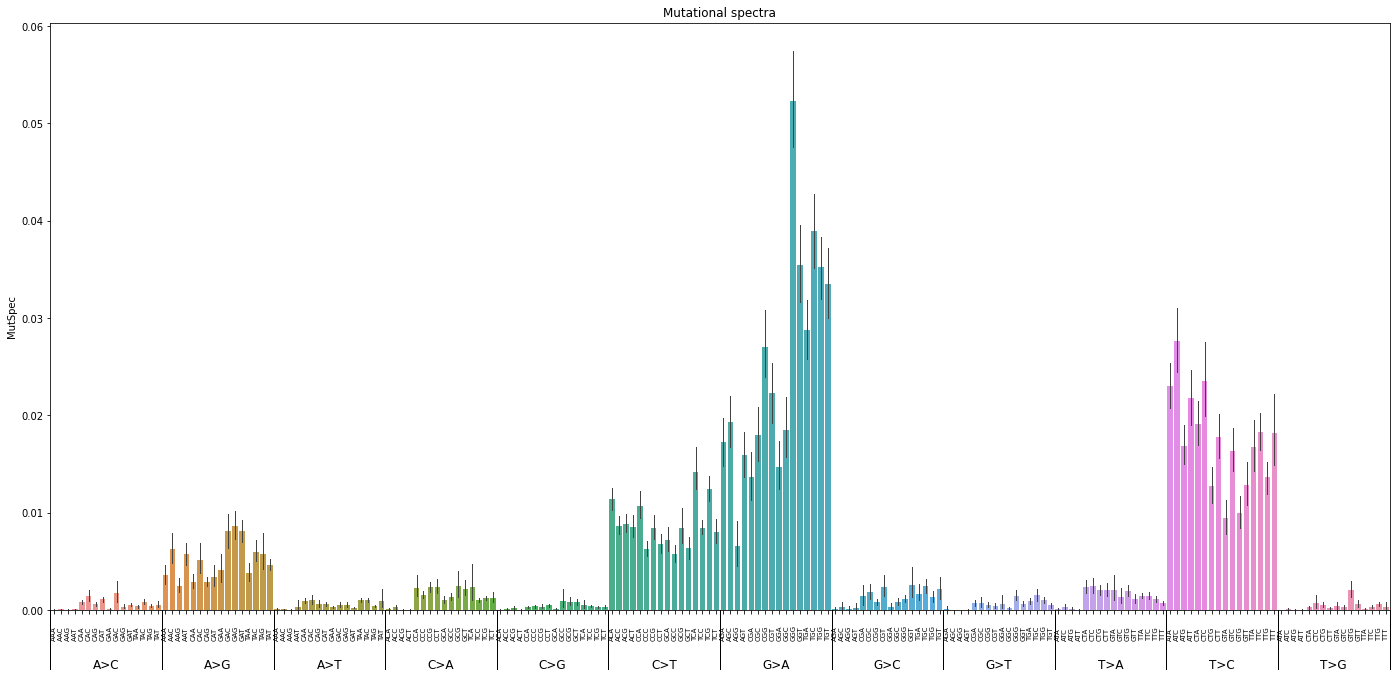

In [141]:
plot_mutspec192(mutspecs)